In [1]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 3.0}
figure = {'figsize' : [6.0, 6/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob2 as glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
# navegar pelas pastas

In [2]:
###     Aqui começa a primeira parte do exp 4b

file_001x_100 = 'ampl_inversor/ampl_inv_001x_100mV.dat'
file_001x_100_freq = 'ampl_inversor/ampl_inv_001x_100mV_freq.dat'
file_005x_100 = 'ampl_inversor/ampl_inv_005x_100mV.dat'
file_005x_100_freq = 'ampl_inversor/ampl_inv_005x_100mV_freq.dat'
file_010x_100 = 'ampl_inversor/ampl_inv_010x_100mV.dat'
file_010x_100_freq = 'ampl_inversor/ampl_inv_010x_100mV_freq.dat'
file_050x_050 = 'ampl_inversor/ampl_inv_050x_050mV.dat'
file_050x_050_freq = 'ampl_inversor/ampl_inv_050x_050mV_freq.dat'
file_100x_040 = 'ampl_inversor/ampl_inv_100x_040mV.dat'
file_100x_040_freq = 'ampl_inversor/ampl_inv_100x_040mV_freq.dat'
file_500x_020 = 'ampl_inversor/ampl_inv_500x_020mV.dat'
file_500x_020_freq = 'ampl_inversor/ampl_inv_500x_020mV_freq.dat'
file_1000x_020 = 'ampl_inversor/ampl_inv_1000x_020mV.dat'
file_1000x_020_freq = 'ampl_inversor/ampl_inv_1000x_020mV_freq.dat'

df001_100 = pd.read_table(file_001x_100,sep='\s+') # DataFrame segundo Pandasdf
df001_100.columns = ['time(s)', 'CH1(V)', 'CH2(V)']
df001_100.head() # preview the first few rows

df001_100_freq = pd.read_table(file_001x_100_freq,sep='\s+') # DataFrame segundo Pandasdf
df001_100_freq.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
df001_100_freq.head() # preview the first few rows

df005_100 = pd.read_table(file_005x_100,sep='\s+') # DataFrame segundo Pandasdf
df005_100.columns = ['time(s)', 'CH1(V)', 'CH2(V)']
#df.head() # preview the first few rows

df005_100_freq = pd.read_table(file_005x_100_freq,sep='\s+') # DataFrame segundo Pandasdf
df005_100_freq.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
#df.head() # preview the first few rows

df010_100 = pd.read_table(file_010x_100,sep='\s+') # DataFrame segundo Pandasdf
df010_100.columns = ['time(s)', 'CH1(V)', 'CH2(V)']
#df.head() # preview the first few rows

df010_100_freq = pd.read_table(file_010x_100_freq,sep='\s+') # DataFrame segundo Pandasdf
df010_100_freq.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
#df.head() # preview the first few rows

df050_050 = pd.read_table(file_050x_050,sep='\s+') # DataFrame segundo Pandasdf
df050_050.columns = ['time(s)', 'CH1(V)', 'CH2(V)']
#df.head() # preview the first few rows

df050_050_freq = pd.read_table(file_050x_050_freq,sep='\s+') # DataFrame segundo Pandasdf
df050_050_freq.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
#df.head() # preview the first few rows

df100_040 = pd.read_table(file_100x_040,sep='\s+') # DataFrame segundo Pandasdf
df100_040.columns = ['time(s)', 'CH1(V)', 'CH2(V)']
#df.head() # preview the first few rows

df100_040_freq = pd.read_table(file_100x_040_freq,sep='\s+') # DataFrame segundo Pandasdf
df100_040_freq.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
#df.head() # preview the first few rows

df500_020 = pd.read_table(file_500x_020,sep='\s+') # DataFrame segundo Pandasdf
df500_020.columns = ['time(s)', 'CH1(V)', 'CH2(V)']
#df.head() # preview the first few rows

df500_020_freq = pd.read_table(file_500x_020_freq,sep='\s+') # DataFrame segundo Pandasdf
df500_020_freq.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
#df.head() # preview the first few rows

df1000_020 = pd.read_table(file_1000x_020,sep='\s+') # DataFrame segundo Pandasdf
df1000_020.columns = ['time(s)', 'CH1(V)', 'CH2(V)']
#df.head() # preview the first few rows

df1000_020_freq = pd.read_table(file_1000x_020_freq,sep='\s+') # DataFrame segundo Pandasdf
df1000_020_freq.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
#df.head() # preview the first few rows

In [3]:
dflist = [df001_100, df005_100, df010_100, df050_050, df100_040, df500_020, df1000_020]
dffreqlist = [df001_100_freq, df005_100_freq, df010_100_freq, df050_050_freq, df100_040_freq, df500_020_freq, df1000_020_freq]

In [4]:
Av = []
for index in range(0,7):
    df = dflist[index]
    Av.append(np.max(df['CH2(V)'])/np.max(df['CH1(V)']))

print(Av)

#ganho    R_in (Ohm)     R_feedback
#1       (992 +/- 1)     (993 +/- 1) 
#5       (992 +/- 1)     (4.65 +/- 0.01) k 
#10      (992 +/- 1)     (9.79 +/- 0.01) k 
#50      (992 +/- 1)     (46.8 +/- 0.1) k 
#100     (100.5 +/- 0.1) (9.79 +/- 0.01) k 
#500     (100.5 +/- 0.1) (46.8 +/- 0.1) k 
#1000    (100.5 +/- 0.1) (98.6 +/- 0.1) k 

[1.0677966101694916, 4.830508474576272, 10.0, 49.152542372881356, 101.5625, 448.4848484848485, 756.7567567567568]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


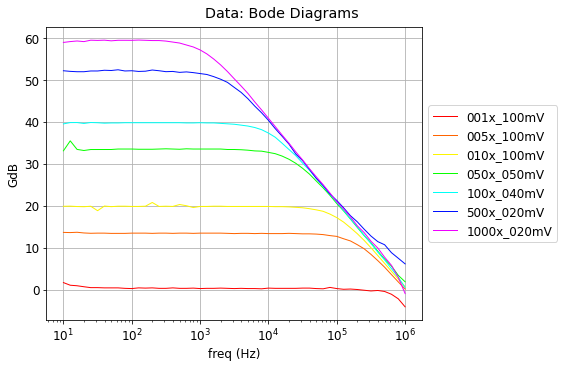

In [5]:
res_val = np.array([0, 12, 15, 20, 25, 30, 35])
cm=plt.get_cmap('hsv')
norm = colors.Normalize(vmin = 10,vmax = 20)
fig,ax = plt.subplots(figsize=(8,5))

label_vec = ['001x_100mV', '005x_100mV', '010x_100mV', '050x_050mV', '100x_040mV', '500x_020mV', '1000x_020mV']

for ii in range(0,7):
    dataframe = dffreqlist[ii]
    ax0=ax
    G = 20*np.log10((dataframe['CH2(V)'])/(dataframe['CH1(V)']))
    ax0.semilogx(dataframe['freq(Hz)'], G, lw=1, ls='-',color=cm((norm(res_val[ii]))*1/3), label=label_vec[ii])
    #--
    #ax0.set_xlim([0,40])
    ax0.grid(True)
    ax0.set_xlabel('freq (Hz)')
    ax0.set_ylabel('GdB')
    #ax0.legend(loc='center left',bbox_to_anchor=(1,0.5))
    #------------------

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
#----
st = fig.suptitle('Data: Bode Diagrams')
# shift subplots down:
st.set_y(1.02)

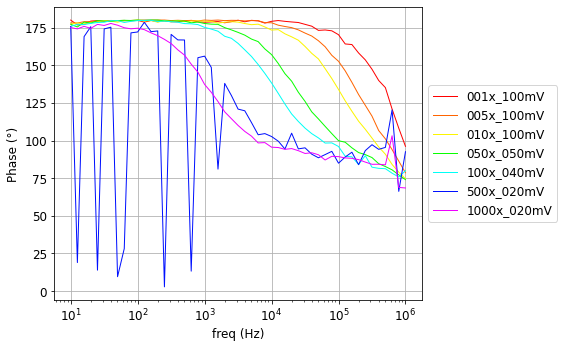

In [6]:
res_val = np.array([0, 12, 15, 20, 25, 30, 35])
cm=plt.get_cmap('hsv')
norm = colors.Normalize(vmin = 10,vmax = 20)
figf,axf = plt.subplots(figsize=(8,5))

label_vec = ['001x_100mV', '005x_100mV', '010x_100mV', '050x_050mV', '100x_040mV', '500x_020mV', '1000x_020mV']

for ii in range(0,7):
    dataframe = dffreqlist[ii]
    ax0=axf
    ax0.semilogx(dataframe['freq(Hz)'], dataframe['fase'], lw=1, ls='-',color=cm((norm(res_val[ii]))*1/3), label=label_vec[ii])
    #--
    #ax0.set_xlim([0,40])
    ax0.grid(True)
    ax0.set_xlabel('freq (Hz)')
    ax0.set_ylabel('Phase (°)')
    #ax0.legend(loc='center left',bbox_to_anchor=(1,0.5))
    #------------------

handles, labels = axf.get_legend_handles_labels()
axf.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
#----
st = fig.suptitle('Data: Phase as a function of frequency')
# shift subplots down:
st.set_y(1.02)

### Aqui termina a primeira parte do experimento 4b

In [8]:
### Aqui começa a segunda parte do experimento 4b - Filtros passa alta de um e 2 polos
file_1polo = 'passa-altas/ampl_PA_1polo.dat'
file_2polos = 'passa-altas/ampl_PA_2polos.dat'

df1polo = pd.read_table(file_1polo,sep='\s+') # DataFrame segundo Pandasdf
df1polo.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
df1polo.head() # preview the first few rows

df2polos = pd.read_table(file_2polos,sep='\s+') # DataFrame segundo Pandasdf
df2polos.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
df2polos.head() # preview the first few rows

,freq(Hz),CH1(V),CH2(V),CH1_scale(V/div),CH2_scale(V/div),time_scale(s),fase
0,10.000000,16.512001,0.030673,3.2,0.00862,0.050,9.900000e+37
1,12.589254,17.408001,0.021946,3.2,0.00762,0.025,9.900000e+37
2,15.848932,18.304001,0.024278,3.2,0.00674,0.025,5.407860e+01
3,19.952623,18.816002,0.026322,3.2,0.00621,0.025,1.241898e+02
4,25.118864,19.328001,0.013513,3.2,0.00497,0.010,4.534533e+00


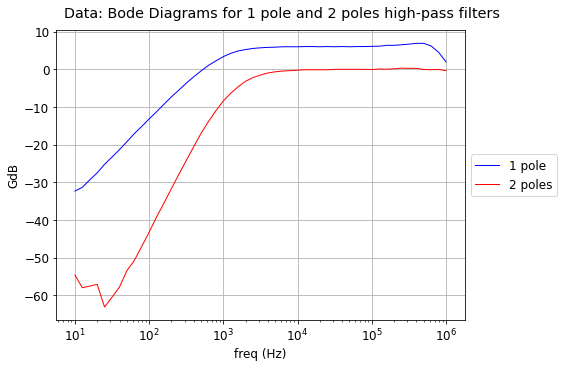

In [9]:
arr_cores = np.array([0, 15])
cm2=plt.get_cmap('hsv')
norm2 = colors.Normalize(vmin = 10,vmax = 20)
fig2,ax2 = plt.subplots(figsize=(8,5))

G_1polo = 20*np.log10((df1polo['CH2(V)'])/(df1polo['CH1(V)']))
G_2polos = 20*np.log10((df2polos['CH2(V)'])/(df2polos['CH1(V)']))
ax2.semilogx(df1polo['freq(Hz)'], G_1polo, lw=1, ls='-',color='blue', label='1 pole')
ax2.semilogx(df2polos['freq(Hz)'], G_2polos, lw=1, ls='-',color='red', label='2 poles')
ax2.grid(True)
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('GdB')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
#----
st = fig2.suptitle('Data: Bode Diagrams for 1 pole and 2 poles high-pass filters')
# shift subplots down:
st.set_y(1.02)

In [10]:
#R_10k = 9.85 +/- 0.05 k
#R_47k = 46.9 +/- 0.1 k
#C = 1 uF
### Aqui acaba - por enquanto - a segunda parte do experimento 4b

In [11]:
###   Aqui começa a terceira (e última) parte do experimento 4b - passa bandas
file_pb = 'passa_banda_C_2 = 22nF/ampl_passa_banda_4V.dat'
file_pb1k = 'passa_banda_C_2 = 22nF/ampl_passa_banda_4V_1KHz.dat'

dfpb = pd.read_table(file_pb,sep='\s+') # DataFrame segundo Pandasdf
dfpb.columns = ['freq(Hz)','CH1(V)','CH2(V)','CH1_scale(V/div)','CH2_scale(V/div)','time_scale(s)','fase']
dfpb.head() # preview the first few rows

dfpb1k = pd.read_table(file_pb1k,sep='\s+') # DataFrame segundo Pandasdf
dfpb1k.columns = ['time(s)','CH1(V)','CH2(V)']
dfpb1k.head() # preview the first few rows

,time(s),CH1(V),CH2(V)
0,0.000001,-1.92,8.6
1,0.000002,-1.92,8.8
2,0.000003,-1.92,8.8
3,0.000004,-1.92,8.8
4,0.000005,-1.92,8.8


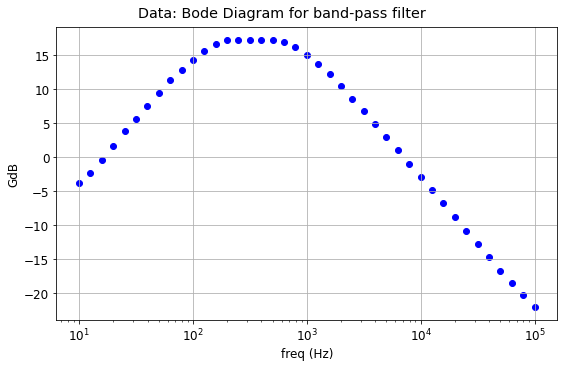

In [12]:
fig3,ax3 = plt.subplots(figsize=(8,5))

G_pb = 20*np.log10(np.abs((dfpb['CH2(V)'])/(dfpb['CH1(V)'])))
ax3.scatter(dfpb['freq(Hz)'], G_pb, lw=1, ls='-',color='blue')
ax3.grid(True)
ax3.set_xscale('log')
ax3.set_xlabel('freq (Hz)')
ax3.set_ylabel('GdB')

#handles, labels = ax3.get_legend_handles_labels()
#ax3.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
#----
st = fig3.suptitle('Data: Bode Diagram for band-pass filter')
# shift subplots down:
st.set_y(1.02)

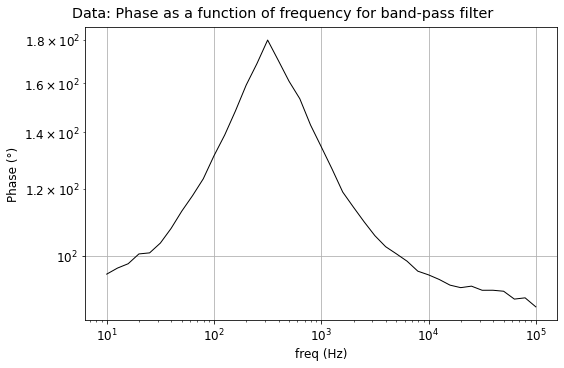

In [13]:
fig4,ax4 = plt.subplots(figsize=(8,5))

ax4.loglog(dfpb['freq(Hz)'], dfpb['fase'], lw=1, ls='-',color='black')
#ax4.plot(dfpb['freq(Hz)'], dfpb['fase'], lw=1, ls='-',color='black')
ax4.grid(True)
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('Phase (°)')

#handles, labels = ax3.get_legend_handles_labels()
#ax3.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
#----
st = fig4.suptitle('Data: Phase as a function of frequency for band-pass filter')
# shift subplots down:
st.set_y(1.02)

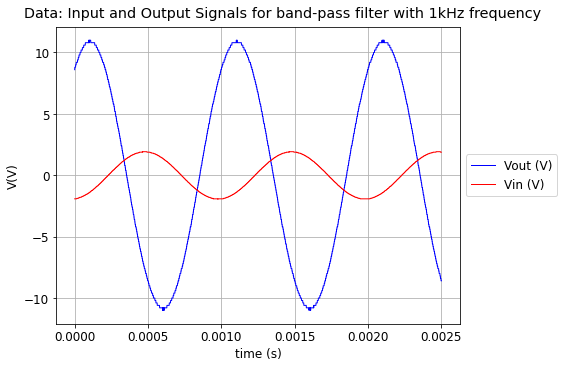

In [14]:
fig5,ax5 = plt.subplots(figsize=(8,5))

#ax5.loglog(dfpb['freq(Hz)'], dfpb['fase'], lw=1, ls='-',color='black')
ax5.plot(dfpb1k['time(s)'], dfpb1k['CH2(V)'], lw=1, ls='-',color='blue', label = 'Vout (V)')
ax5.plot(dfpb1k['time(s)'], dfpb1k['CH1(V)'], lw=1, ls='-',color='red', label = 'Vin (V)')
ax5.set_xlabel('time (s)')
ax5.set_ylabel('V(V)')

handles, labels = ax5.get_legend_handles_labels()
ax5.legend(loc='center left',bbox_to_anchor=(1,0.5))

ax5.grid(True)
plt.tight_layout()
#----
st = fig5.suptitle('Data: Input and Output Signals for band-pass filter with 1kHz frequency')
# shift subplots down:
st.set_y(1.02)

#plt.savefig(file_naoinv_square+'_fig.png', bbox_inches="tight")

### Aqui termina a terceira - e última - parte do experimento 4b (até agora)

In [15]:
### FIT BAND-PASS FILTER (GAIN AS A FUNCTION OF FREQUENCY)

from lmfit import Model, Parameters

w1 = 1000
w2 = 45454
def gaindb(w, r):
    return np.log(r/np.sqrt(1+(w1/w2)**2+(w/w2)**2+(w1/w)**2))

mod = Model(gaindb)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

# onda completa
params = mod.make_params(r=1)
result = mod.fit(G_pb, params, w=2*np.pi*dfpb['freq(Hz)'])

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
r = dic_result['r']
print(np.sqrt(np.pi))

parameter names: ['r']
independent variables: ['w']
[[Model]]
    Model(gaindb)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 41
    # variables        = 1
    chi-square         = 5130.14214
    reduced chi-square = 128.253554
    Akaike info crit   = 200.001980
    Bayesian info crit = 201.715552
[[Variables]]
    r:  90.7921637 +/- 160.553265 (176.84%) (init = 1)
OrderedDict([('r', 90.79216365325708)])
1.7724538509055159


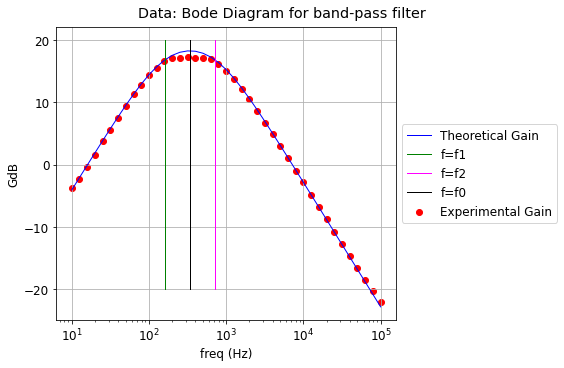

In [16]:
fig7,ax7 = plt.subplots(figsize=(8,5))
R2 = 10e3
R1 = 1e3
C1 = 1e-6
C2 = 22e-9
w1 = 1/(R1*C1)
w2 = 1/(R2*C2)
w = 2*np.pi*dfpb['freq(Hz)']
raiz = np.sqrt(((1+(w1/w2))**2)+(((w/w2)-(w1/w))**2))
G_teo = 20*np.log10((R2/R1)*(1/raiz))

G_pb = 20*np.log10(np.abs((dfpb['CH2(V)'])/(dfpb['CH1(V)'])))
ax7.scatter(dfpb['freq(Hz)'], G_pb,marker = None, color='red', label = 'Experimental Gain')
ax7.grid(True)
ax7.set_xscale('log')

ax7.semilogx(dfpb['freq(Hz)'], G_teo, lw=1, ls='-',color='blue', label = 'Theoretical Gain')
ax7.grid(True)
#ax7.set_xscale('log')
ax7.set_xlabel('freq (Hz)')
ax7.set_ylabel('GdB')

y_coordinates = [-20, 20]
x_coordinates = [w1/(2*np.pi), w1/(2*np.pi)]
ax7.plot(x_coordinates, y_coordinates, lw=1, ls='-',color='green', label = 'f=f1')

y_coordinates = [-20, 20]
x_coordinates = [w2/(2*np.pi), w2/(2*np.pi)]
ax7.plot(x_coordinates, y_coordinates, lw=1, ls='-',color='magenta', label = 'f=f2')

y_coordinates = [-20, 20]
x_coordinates = [np.sqrt(w2*w1/(4*(np.pi)**2)), np.sqrt(w2*w1/(4*(np.pi)**2))]
ax7.plot(x_coordinates, y_coordinates, lw=1, ls='-',color='black', label = 'f=f0')

handles, labels = ax7.get_legend_handles_labels()
ax7.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
#----
st = fig7.suptitle('Data: Bode Diagram for band-pass filter')
# shift subplots down:
st.set_y(1.02)

In [ ]:
print(c0)
print(T)
#------------------------------------
#Generate the "theory" curves from our fitted model
vripT1_vec= (vmax_vec[0])/(c0*res_val)*T #linearizado
vripT2_vec= vmax_vec[0]*(1 - np.exp(-T/(res_val*c0)) ) #completo
#------------------------------------
fig,ax = plt.subplots(3,1,figsize=(5,5), sharex=True)
ax0=ax[0]
ax0.grid(True)
ax0.set_ylabel('Tensão média $V_{dc}$ (V)')
#------------------------------------
for ii,r0 in enumerate(res_val):
    # this if is to skip the case with no capacitor (ii=0) and no resistor (ii=12)
    if (ii>=1 and ii<len(res_val)-1): 
        ax[0].scatter(Rinverse[ii],vmed_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[1].scatter(Rinverse[ii],vrms_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[2].scatter(Rinverse[ii],vrip_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
#---------------
ax0=ax[1]
ax0.grid(True)
ax0.set_ylabel('Tensão média RMS $V_{rms}$ (V)')
#------------------------------------
        
#----------
ax0=ax[2]
ax0.grid(True)
#-------------------
ax0.plot(Rinverse,vripT1_vec,'-',label ='linear')
ax0.plot(Rinverse,vripT2_vec,'-',label = 'completo')

ax0.set_ylabel('Tensão de Ripple $V_{rip}$ (V)')
ax0.set_xlabel('$R^{-1}$ (mS)')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(loc='center left',bbox_to_anchor=(1,1))
#----
st = fig.suptitle('Dado: simulação onda completa cfit={:2.1f} μF'.format(1e6*c0))
# shift subplots down:
st.set_y(1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
#plt.savefig('analise_onda_completa_teoria'+'_fig.png', bbox_inches='tight')

In [ ]:
#------------------------------------
#Generate the "theory" curves from our fitted model
vripT1_vec= (vmax_vec[0])/(c0*res_val)*T #linearizado
vripT2_vec= vmax_vec[0]*(1 - np.exp(-T/(res_val*c0)) ) #completo
#------------------------------------
fig,ax = plt.subplots(2,1,figsize=(5,5), sharex=True)
ax0=ax[0]
ax0.grid(True)
ax0.set_ylabel('Tensão média $V_{dc}$ (V)')
#------------------------------------
for ii,r0 in enumerate(res_val):
    # this if is to skip the case with no capacitor (ii=0) and no resistor (ii=12)
    if (ii>=1 and ii<len(res_val)-1): 
        ax[0].scatter(Rinverse[ii],vmed_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[1].scatter(Rinverse[ii],vrip_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
#---------------
ax0=ax[1]
ax0.grid(True)
#-------------------
ax0.plot(Rinverse,vripT1_vec,'-',label ='linear')
ax0.plot(Rinverse,vripT2_vec,'-',label = 'completo')

ax0.set_ylabel('Tensão de Ripple $V_{rip}$ (V)')
ax0.set_xlabel('$R^{-1}$ (mS)')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(loc='center left',bbox_to_anchor=(1,1))
#----
st = fig.suptitle('Dado: simulação onda completa cfit={:2.1f} μF'.format(1e6*c0))
# shift subplots down:
st.set_y(1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('analise_onda_completa_teoria'+'_fig.png', bbox_inches='tight')

In [119]:
Av = np.max(df['V_out(V)'])/np.max(df['V_in(V)'])
print(Av, 'vout = ', np.max(df['V_out(V)']), 'vin = ', np.max(df['V_in(V)']))

3.013698630136986 vout =  0.176 vin =  0.0584


In [3]:
file = 'dados_transistor_3a/dados_Ic_vs_Ib_Vbb_Vcc_15p5V.csv'
df = pd.read_csv(file,sep=',') # DataFrame segundo Pandasdf
df.head() # preview the first few rows

,tempo(s),Vbb(V),Vbe(V),Vce(V)
0,0.0004,8.08,0.72,0.24
1,0.0008,8.00,0.72,0.24
2,0.0012,8.00,0.72,0.24
3,0.0016,8.00,0.72,0.24
4,0.0020,8.00,0.72,0.24


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


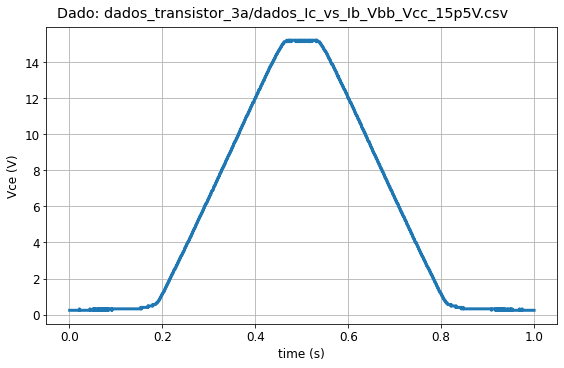

In [4]:
#----
plt.ion()
fig,ax = plt.subplots(figsize=(8,5))
#------------------------
ax0=ax
#--
ax0.plot(df['tempo(s)'], df['Vce(V)'])

#--
ax0.grid(True)
ax0.set_xlabel('time (s)')
ax0.set_ylabel('Vce (V)')
#------------------------

#------------------
plt.tight_layout()
#----
st = fig.suptitle('Dado: '+file)
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig(file+'_fig.png', bbox_inches="tight")

In [5]:
Rc = 220
Ic = (15-df['Vce(V)'])/Rc
print(Ic.head())
Rb = 10e3
Ib = (df['Vbb(V)']-df['Vbe(V)'])/Rb
print(Ib.head())

0    0.067091
1    0.067091
2    0.067091
3    0.067091
4    0.067091
Name: Vce(V), dtype: float64
0    0.000736
1    0.000728
2    0.000728
3    0.000728
4    0.000728
dtype: float64


# Fitting and model

In [23]:
from lmfit import Model, Parameters

def collector_current(i_b, beta):
    return beta*i_b

mod = Model(collector_current)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['beta']
independent variables: ['i_b']


In [27]:
# onda completa
params = mod.make_params(beta=100)
result = mod.fit(df_fit['Ic'], params, i_b=df_fit['Ib'])

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
beta = dic_result['beta']

[[Model]]
    Model(collector_current)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 1462
    # variables        = 1
    chi-square         = 4.5196e-04
    reduced chi-square = 3.0935e-07
    Akaike info crit   = -21912.6200
    Bayesian info crit = -21907.3324
[[Variables]]
    beta:  156.296518 +/- 0.06944187 (0.04%) (init = 100)
OrderedDict([('beta', 156.296517804982)])


In [20]:
# onda completa
params = mod.make_params(beta=100)
result = mod.fit(Ic, params, i_b=Ib)

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
beta = dic_result['beta']

[[Model]]
    Model(collector_current)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 2500
    # variables        = 1
    chi-square         = 0.21007652
    reduced chi-square = 8.4064e-05
    Akaike info crit   = -23458.8237
    Bayesian info crit = -23452.9996
[[Variables]]
    beta:  121.562199 +/- 0.45736201 (0.38%) (init = 100)
OrderedDict([('beta', 121.56219894736537)])


2.749008693746935e-05
0.008333333333333333


<ipython-input-37-2a52573297b3>:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


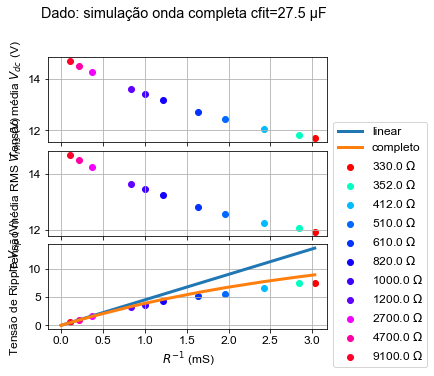

In [ ]:
print(c0)
print(T)
#------------------------------------
#Generate the "theory" curves from our fitted model
vripT1_vec= (vmax_vec[0])/(c0*res_val)*T #linearizado
vripT2_vec= vmax_vec[0]*(1 - np.exp(-T/(res_val*c0)) ) #completo
#------------------------------------
fig,ax = plt.subplots(3,1,figsize=(5,5), sharex=True)
ax0=ax[0]
ax0.grid(True)
ax0.set_ylabel('Tensão média $V_{dc}$ (V)')
#------------------------------------
for ii,r0 in enumerate(res_val):
    # this if is to skip the case with no capacitor (ii=0) and no resistor (ii=12)
    if (ii>=1 and ii<len(res_val)-1): 
        ax[0].scatter(Rinverse[ii],vmed_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[1].scatter(Rinverse[ii],vrms_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[2].scatter(Rinverse[ii],vrip_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
#---------------
ax0=ax[1]
ax0.grid(True)
ax0.set_ylabel('Tensão média RMS $V_{rms}$ (V)')
#------------------------------------
        
#----------
ax0=ax[2]
ax0.grid(True)
#-------------------
ax0.plot(Rinverse,vripT1_vec,'-',label ='linear')
ax0.plot(Rinverse,vripT2_vec,'-',label = 'completo')

ax0.set_ylabel('Tensão de Ripple $V_{rip}$ (V)')
ax0.set_xlabel('$R^{-1}$ (mS)')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(loc='center left',bbox_to_anchor=(1,1))
#----
st = fig.suptitle('Dado: simulação onda completa cfit={:2.1f} μF'.format(1e6*c0))
# shift subplots down:
st.set_y(1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
#plt.savefig('analise_onda_completa_teoria'+'_fig.png', bbox_inches='tight')

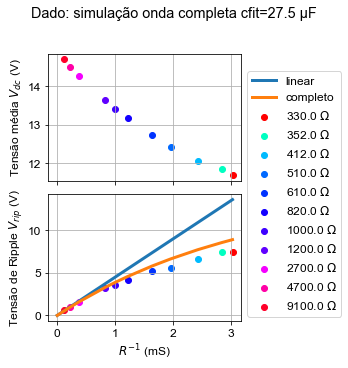

In [ ]:
#------------------------------------
#Generate the "theory" curves from our fitted model
vripT1_vec= (vmax_vec[0])/(c0*res_val)*T #linearizado
vripT2_vec= vmax_vec[0]*(1 - np.exp(-T/(res_val*c0)) ) #completo
#------------------------------------
fig,ax = plt.subplots(2,1,figsize=(5,5), sharex=True)
ax0=ax[0]
ax0.grid(True)
ax0.set_ylabel('Tensão média $V_{dc}$ (V)')
#------------------------------------
for ii,r0 in enumerate(res_val):
    # this if is to skip the case with no capacitor (ii=0) and no resistor (ii=12)
    if (ii>=1 and ii<len(res_val)-1): 
        ax[0].scatter(Rinverse[ii],vmed_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[1].scatter(Rinverse[ii],vrip_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
#---------------
ax0=ax[1]
ax0.grid(True)
#-------------------
ax0.plot(Rinverse,vripT1_vec,'-',label ='linear')
ax0.plot(Rinverse,vripT2_vec,'-',label = 'completo')

ax0.set_ylabel('Tensão de Ripple $V_{rip}$ (V)')
ax0.set_xlabel('$R^{-1}$ (mS)')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(loc='center left',bbox_to_anchor=(1,1))
#----
st = fig.suptitle('Dado: simulação onda completa cfit={:2.1f} μF'.format(1e6*c0))
# shift subplots down:
st.set_y(1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('analise_onda_completa_teoria'+'_fig.png', bbox_inches='tight')

\thispagestyle{plain}
The proposed amplifier circuit has a RC high pass filter built-in, so the filtering behaviors are also valid for this case. The RC circuit will apply a phase shift and will attenuate the voltage amplitude if compared to $V_{in}$ in frequencies below the cutoff frequency. From the Bode plot below, we can find the cutoff frequency, $f_{co}$, finding the frequency closest to the line of 3dB below the maximum frequency. By searching in the data collected by the oscilloscope we found that $f_{co}\approx1000$ Hz. 

\begin{figure}[H]
    \centering
    \includegraphics[scale=.35]{Exp 3/Gráficos/bode_plot_fig.png}
    \caption{Bode plot relating the gain function to the generator frequency}
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[scale=.35]{Exp 3/Gráficos/ch1xch2_fig.png}
    \caption{Voltage comparison between the generated signal (CH1) and the amplified signal (CH2)}
\end{figure}

The graph above evidences the amplifier behavior of the circuit. As shown, the signal in the collector is amplified, with the maximum gain of $G_{max} = 9.6$ dB in relation to the generated signal. Which confirm the following approximation derived in class:

\[ G_{max} = -\frac{R_c}{R_e}\]

We also measured the phase shift introduced by the circuit, however the data collected did not agreed the common knowledge of transistors that it would apply a $\pi$ phase to the signal. Therefore, we believe there were some systematic error with these measurements, so we are no further commenting on them.

We conclude that the Base Voltage is determined by the RC filter composed of $R_1$ and the capacitor, so the behavior found is compatible with the theoretical predictions, and the Emitter Voltage has approximately the same value as the base voltage, while the collector voltage shows an amplified behavior. The following part will illustrate a common design of amplifiers: a cascade.

\thispagestyle{plain}

\section*{Part C}
In this part of the experiment, we studied an amplifier more similar to the ones actually used in real life, built with a cascade of 5 different circuits. We analyzed results for different compositions of those circuits, with the goal to understand how each circuit affects the input signal.

These 5 basic circuits had the following goals:
\begin{itemize}
    \item Circuit 1: A voltage divider, that lowers the signal to a fraction (depending of the resistances of the used resistors)
    \item Circuit 2: An Impedance Matching circuit that increases the impedance of the total set of circuits. This circuit uses a Common-Collector circuit.
    \item Circuit 3: An amplifier circuit, composed of a Common-Emitter circuit that increases the amplitude of the signal.
    \item Circuit 4: Another Impedance Matching circuit.
    \item Circuit 5: The load resistor, which is simply a resistor that registers the incoming signal.
\end{itemize}

The complete amplifier is shown in the following schematics made with QUCS, which also includes simulation of how the output signals of some of the circuits are affected:

\begin{figure}[H]
    \centering
    \includegraphics[scale=.3]{Exp 3/Gráficos/export.png}
    \caption{QUCS Schematics of the cascade amplifier circuit}
\end{figure}

The following compositions of circuits were analyzed: 1, 2, 3, 4, 1+2+3, 1+3, 1+3+5, 3+5, 3+4+5, and 1+2+3+4+5. The data of the output and input signals of these circuits is shown in the attachments.

We then analyze the Thevenin equivalents of each of the circuits, using Thevenin Black Boxes:

\begin{figure}[H]
    \centering
    \includegraphics[scale=.5]{Exp 3/Gráficos/circthev.png}
    \caption{Thevenin Equivalent}
\end{figure}
\thispagestyle{plain}

This model states that $R_{in}$ is the internal impedance, $R_{out}$ is the output inpedance and $v_{out}$ is $A_v v_{in}$ Using this model we have for the circuits 2, 3, and 4 from the experiment:

\begin{itemize}
    \item Circuit 2: $A_v=\frac{R_E}{r_e+R_E} \approx 1$, $R_{in} = \bigg (\frac{R_1 R_2}{R_1+R_2} \bigg)|(\beta R_E) = 42.17 k\Omega$, $R_{out} = (R_E)|(r_e) \approx r_e $
    \item Circuit 3: $A_v = \frac{-R_C}{r_e+R_E} \approx \frac{-R_C}{R_E} = -10$, $R_{in} = \bigg (\frac{R_1 R_2}{R_1+R_2} \bigg)|(\beta R_E+\beta r_e)\approx \frac{R_1 R_2}{R_1+R_2} = 1.92 k\Omega$, $R_{out} = R_C = 17.7 k \Omega$
    \item Circuit 4: $A_v=\frac{R_E}{r_e+R_E} \approx 1$, $R_{in} = \bigg (\frac{R_1 R_2}{R_1+R_2} \bigg)|(\beta R_E) = 42.17 k\Omega$, $R_{out} = (R_E)|(r_e) \approx r_e$
\end{itemize}

For circuit 5, there is no need to use Thevenin equivalent, and for circuit 1, the Thevenin equivalent is $R_{Th} = (r_{int}+R_1)|(R_2) = 2.33 k\Omega$ $V_{Th}= V_{in} \frac{R_2}{r_{int}+R_1+R_2} = 0.497 V_{in}$.

We can compare these theoretical results to the ones obtained from the dataset:

\begin{center}
\begin{tabular}{|c c|} 
 \hline
 Circuit & Experimental Gain \\
 \hline\hline
 1 & 0.52 \\ 
 \hline
 2 & 1.00 \\
 \hline
 3 & -9.84 \\
 \hline
 4 & 1.00 \\
 \hline
 1+2+3 & -9.67 \\ 
 \hline
 1+3 & -9.59 \\
 \hline
 1+3+5 & -3.01 \\
 \hline
 3+5 & -3.22 \\
 \hline
 3+4+5 & -7.90 \\
 \hline
 1+2+3+4+5 & -7.83 \\
 \hline
\end{tabular}
\end{center}
\thispagestyle{plain}